Fujiwara-Algoet conditions (FAC) for the complete positivity of a unital qubit channel:

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from drift_qec.Q import *

k, p = 0.1, 0.1

/Users/yan/.miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Schedule

In [3]:
Qval, _ = np.linalg.qr(np.random.random((3,3)))
Mval = np.dot(np.dot(Qval.T, SURF(k, p)), Qval)

Qhat = solveQhat(SURF(k, p), Mval)

print "C1: {}".format(C1(Qhat, SURF(k, p), Mval))
print "C2: {}".format(C2(Qhat, SURF(k, p), Mval))

C1: 9.22460769282e-10
C2: 2.95521044359e-31


## One step of the evolution

In [140]:
Qval1, _ = np.linalg.qr(np.random.random((3,3)))
Qval2, _ = np.linalg.qr(np.random.random((3,3)))
Mval1 = np.dot(np.dot(Qval1.T, SURF(k, p)), Qval1)
Mval2 = np.dot(np.dot(Qval2.T, SURF(k, p)), Qval2)
test_FAC(np.diag(0.15*Mval1 + 0.85*Mval2))

True

In [5]:
np.linalg.norm(np.dot(np.dot(Qhat, SURF(k, p)), Qhat.T) - Mval)

0.092338375129800351

In [6]:
np.linalg.norm(np.diag(np.dot(np.dot(Qhat, SURF(k, p)), Qhat.T) - Mval))

0.079685778296852014

In [7]:
Mval - np.dot(np.dot(Qval.T, SURF(k, p)), Qval)

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

## Let's try an evolution

In [8]:
k, p = 0.1, 0.1
N_BLOCKS = 200
BLOCK_LENGTH = 10000

Qval, _ = np.linalg.qr(np.random.random((3,3)))
Mval = np.dot(np.dot(Qval, SURF(k, p)), Qval.T)

bank = HistoryBank(np.eye(3), SURF(k, p), 0.15)

Qdist = []
pointer0 = np.zeros((N_BLOCKS+1, 3))
pointer1 = np.zeros((N_BLOCKS+1, 3))
pointer2 = np.zeros((N_BLOCKS+1, 3))
pointer0[0, :] = np.real(bank.Q)[0, :]
pointer1[0, :] = np.real(bank.Q)[1, :]
pointer2[0, :] = np.real(bank.Q)[2, :]

for step in tqdm(range(N_BLOCKS)):
    errs = sample_errors(Mval, BLOCK_LENGTH)
    Qhat = solveQhat(SURF(k, p), Merr(errs))
    Qhat, _ = np.linalg.qr(Qhat)
    bank.update(Qhat)
    Mval = np.dot(np.dot(Qhat, Mval), Qhat.T)
    pointer0[step+1, :] = np.real(bank.Q)[0, :]
    pointer1[step+1, :] = np.real(bank.Q)[1, :]
    pointer2[step+1, :] = np.real(bank.Q)[2, :]
    Qdist.append(np.linalg.norm(np.dot(Qhat.T, Qval) - np.eye(3)))

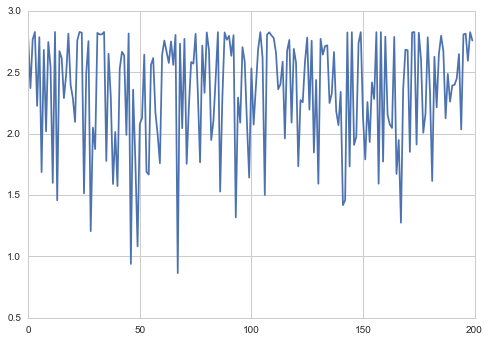

In [9]:
plt.plot(Qdist)

(-1.0, 1.0)

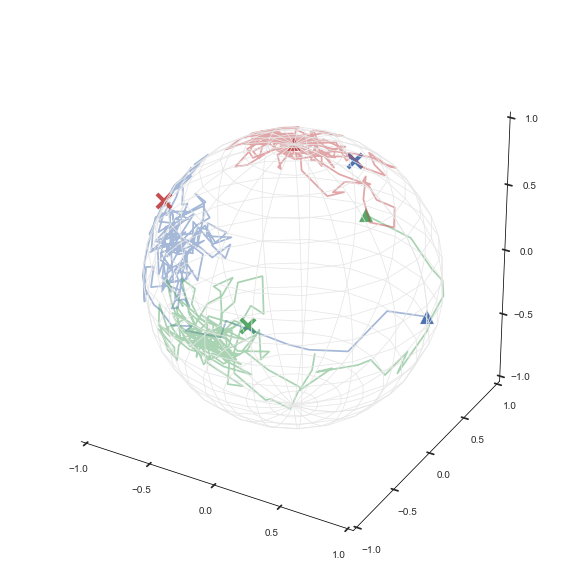

In [10]:
fig = plt.figure(figsize=(14,10))
ax = ["", ""]
ax = fig.add_subplot(111, projection='3d')

ax.set_aspect("equal")
ax.set_frame_on(False)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.grid(False)

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax.plot_wireframe(x, y, z, color=[0.9, 0.9, 0.9], linewidth=0.75)

ax.scatter(1, 0, 0, s=200, c=sns.color_palette()[0], marker="^")
ax.scatter(0, 1, 0, s=200, c=sns.color_palette()[1], marker="^")
ax.scatter(0, 0, 1, s=200, c=sns.color_palette()[2], marker="^")

ax.plot(pointer0[:, 0], pointer0[:, 1], pointer0[:, 2],
        c=sns.color_palette()[0], alpha=0.5)
ax.plot(pointer1[:, 0], pointer1[:, 1], pointer1[:, 2],
        c=sns.color_palette()[1], alpha=0.5)
ax.plot(pointer2[:, 0], pointer2[:, 1], pointer2[:, 2],
        c=sns.color_palette()[2], alpha=0.5)

ax.scatter(Qval[0, 0], Qval[0, 1], Qval[0, 2], s=200,
           c=sns.color_palette()[0], marker="x", linewidth=4.0)
ax.scatter(Qval[1, 0], Qval[1, 1], Qval[1, 2], s=200,
           c=sns.color_palette()[1], marker="x", linewidth=4.0)
ax.scatter(Qval[2, 0], Qval[2, 1], Qval[2, 2], s=200,
           c=sns.color_palette()[2], marker="x", linewidth=4.0)

ax.set_xlim3d([-1.0, 1.0])
ax.set_ylim3d([-1.0, 1.0])
ax.set_zlim3d([-1.0, 1.0])

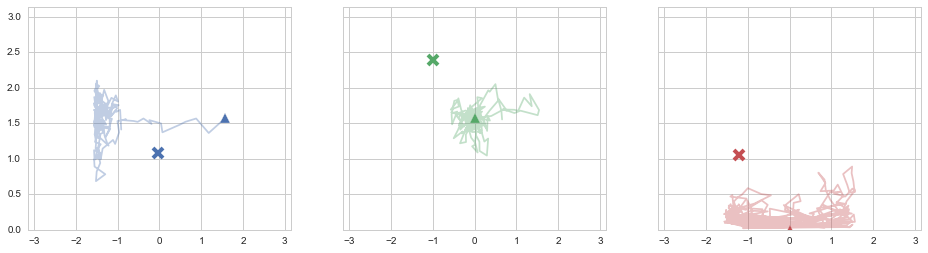

In [11]:
Q0x = np.arcsin(pointer0[:, 0] / np.sqrt(pointer0[:, 0] ** 2 + pointer0[:, 1] ** 2))
Q0y = np.arccos(pointer0[:, 2])
Q0xt = np.arcsin(Qval[0, 0] / np.sqrt(Qval[0, 0] ** 2 + Qval[0, 1] ** 2))
Q0yt = np.arccos(Qval[0, 2])

Q1x = np.arcsin(pointer1[:, 0] / np.sqrt(pointer1[:, 0] ** 2 + pointer1[:, 1] ** 2))
Q1y = np.arccos(pointer1[:, 2])
Q1xt = np.arcsin(Qval[1, 0] / np.sqrt(Qval[1, 0] ** 2 + Qval[1, 1] ** 2))
Q1yt = np.arccos(Qval[1, 2])

Q2x = np.arcsin(pointer2[:, 0] / np.sqrt(pointer2[:, 0] ** 2 + pointer2[:, 1] ** 2))
Q2y = np.arccos(pointer2[:, 2])
Q2xt = np.arcsin(Qval[2, 0] / np.sqrt(Qval[2, 0] ** 2 + Qval[2, 1] ** 2))
Q2yt = np.arccos(Qval[2, 2])

fig, axs = plt.subplots(1, 3, figsize=(16, 4), sharex=True, sharey=True)
axs[0].plot(Q0x, Q0y, c=sns.color_palette()[0], alpha=0.35)
axs[0].scatter(Q0xt, Q0yt, c=sns.color_palette()[0], marker="x", s=100, linewidth=4.0)
axs[0].scatter(np.pi/2, np.pi/2, c=sns.color_palette()[0], marker="^", s=100)
axs[0].set_xlim([-np.pi, np.pi])
axs[0].set_ylim([0.0, np.pi])

axs[1].plot(Q1x, Q1y, c=sns.color_palette()[1], alpha=0.35)
axs[1].scatter(Q1xt, Q1yt, c=sns.color_palette()[1], marker="x", s=100, linewidth=4.0)
axs[1].scatter(0.0, np.pi/2, c=sns.color_palette()[1], marker="^", s=100)

axs[2].plot(Q2x, Q2y, c=sns.color_palette()[2], alpha=0.35)
axs[2].scatter(Q2xt, Q2yt, c=sns.color_palette()[2], marker="x", s=100, linewidth=4.0)
axs[2].scatter(0, 0, c=sns.color_palette()[2], marker="^", s=100)